In [1]:
import pennylane as qml 
print(f'Pennylane Version : {qml.__version__}')

Pennylane Version : 0.31.0


In [2]:
import states             # To compute the exact states by diagonalization
import dmrgqcnn as qcnn   # QCNN class

import matplotlib.pyplot as plt

In [3]:
# The following class computes the ground states of the ANNNI model by diagonalization.
# Depending on the system's size, the computation of the states might take a while
# This will be substituted with DMRG states

diag_states = states.exact_states(N         = 6,   # system size
                                  n_hs      = 100, # discretization of the h parameter (y-axis in the phasediagram)
                                  n_kappas  = 100, # discretization of the k parameter (x-axis in the phasediagram)
                                  h_max     = 2.,  # It will compute the states for the values (0, - h_max    )
                                  kappa_max = 1.)  # It will compute the states for the values (0, + kappa_max)

# It can take a while to jit the function for diagonalization...

100%|██████████| 10000/10000 [01:36<00:00, 103.29it/s]


## QCNN class

In [4]:
# Either way the states are computed (with the exact_states class or with the DMRG)
# the QCNN class require a list of the ground states, and the list of the parameters (k, h)
#
# INPUTS:
# _______________________________
# | STATES        |  PARAMETERS |
# |---------------|-------------|
# | state1 (2**n) | [k1, h1]    |
# | state2 (2**n) | [k2, h2]    |
# | ...           | ...         |
# | stateL (2**n) | [kL, hL]    |
# |_____________________________|

#                      STATES,          PARAMETERS
classifier = qcnn.qcnn(diag_states.PSI, diag_states.H_params)

In [5]:
# TRAIN ON THE 3 PHASES (ANTIPHASE, FERROMAGNETIC AND PARAMAGNETIC)
# just like in the paper, by only using the point in the two axes which are analytical

# Maybe with an higher system size, the trash class will be able to detect the floating phase
res = classifier.train3(epochs  = 1000,
                        lr      = 5e-3,
                        loss_fn = qcnn.cross_entropy)

  0%|          | 0/1000 [00:00<?, ?it/s]/home/saverio/.local/lib/python3.10/site-packages/autoray/autoray.py:981: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return x.astype(dtype, **kwargs)
100%|██████████| 1000/1000 [00:07<00:00, 129.19it/s]


Text(0.5, 0, 'Epochs')

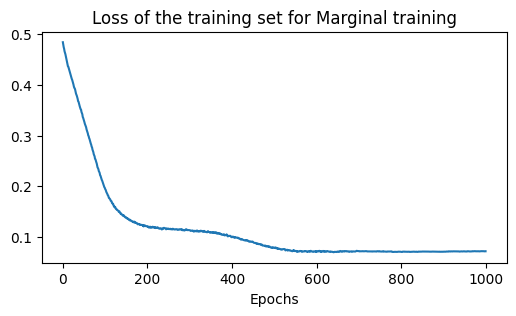

In [6]:
plt.figure(figsize=(6,3))
plt.plot(res)
plt.title('Loss of the training set for Marginal training')
plt.xlabel('Epochs')

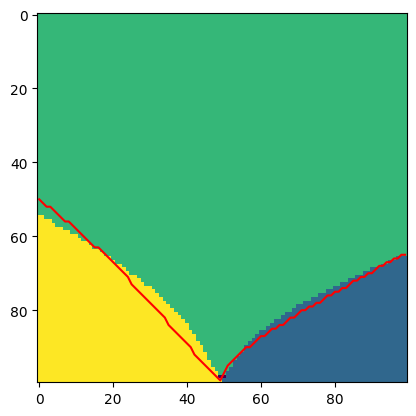

In [7]:
aaa = classifier.show_prediction3()

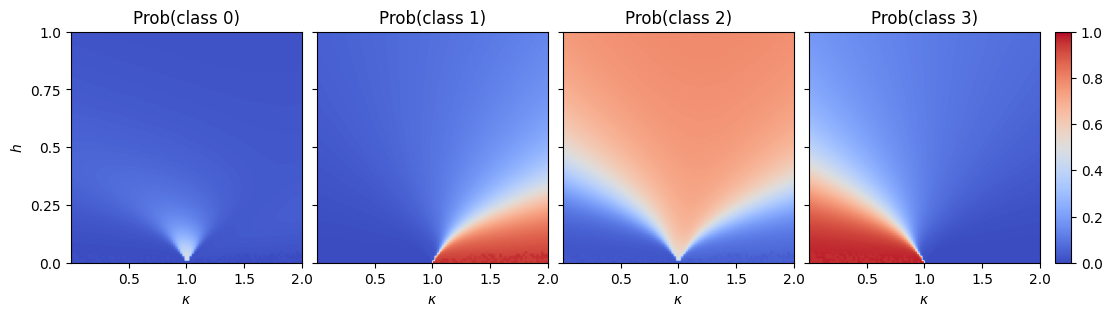

In [8]:
# PROBABILITIES OF EVERY CLASS
# class 0 is the trash class, there is no point in the training set with this label
classifier.showclasses()